In [1]:
import util as ut
import datetime as dt
import pandas as pd

sym = ["GLOB"]
sd = dt.datetime(2000,1,1)
ed = dt.datetime(2016,7,1)
tsd = dt.datetime(2016,7,8)
ted = dt.datetime(2017,1,8)

price = ut.readStocks(sym, dates=pd.date_range(sd, ed))

from Trainer import Trainer
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

args = Namespace(allStocks=False, alpha=0.2, dyna=0, endTrainDate=None, gamma=0.9, mode='train', 
                 num_actions=3, num_states=1000, radr=0.99, rar=0.5, startTrainDate=None, 
                 stocks=['GLOB'], today=None, verbose=False, window=10)

# print(price.head(5))
q = Trainer(args)
# q.addEvidence(["GOOG"], sd, ed)
# q.storeModel("../dat/models/GLOB.mod")
q.loadModel("../dat/models/GLOB.mod")

In [2]:
print(q.learner.q)

[[-0.39669611 -0.84378772  0.71783245]
 [-0.58985907  0.30705915 -0.54328705]
 [-0.55792382 -0.71001524 -0.21594414]
 ..., 
 [-0.11425104 -0.34232925  0.73105899]
 [-0.293151    0.0292193   0.00937614]
 [-0.36103081  0.02094313 -0.13839129]]


In [3]:
orders = q.query(sym, tsd, ted)

                 GLOB
2016-07-08  40.029999
2016-07-11  40.119999
2016-07-12  41.340000
2016-07-13  42.520000
2016-07-14  42.020000
['GLOB']


In [4]:
print(orders)

           Symbol Order  Shares
2016-07-25   GLOB   BUY    10.0
2016-07-28   GLOB  SELL    10.0
2016-08-03   GLOB   BUY    10.0
2016-08-05   GLOB  SELL    10.0
2016-08-08   GLOB   BUY    10.0
2016-08-16   GLOB  SELL    10.0
2016-08-17   GLOB   BUY    10.0
2016-08-23   GLOB  SELL    10.0
2016-08-25   GLOB   BUY    10.0
2016-08-31   GLOB  SELL    10.0
2016-09-01   GLOB   BUY    10.0
2016-09-09   GLOB  SELL    10.0
2016-09-12   GLOB   BUY    10.0
2016-10-04   GLOB  SELL    10.0
2016-10-06   GLOB   BUY    10.0
2016-10-25   GLOB  SELL    10.0
2016-10-26   GLOB   BUY    10.0
2016-10-27   GLOB  SELL    10.0
2016-10-28   GLOB   BUY    10.0
2016-11-11   GLOB  SELL    10.0
2016-11-16   GLOB   BUY    10.0
2016-11-28   GLOB  SELL    10.0
2016-11-30   GLOB   BUY    10.0
2016-12-08   GLOB  SELL    10.0
2016-12-09   GLOB   BUY    10.0
2016-12-12   GLOB  SELL    10.0
2016-12-13   GLOB   BUY    10.0
2016-12-29   GLOB  SELL    10.0
2016-12-30   GLOB   BUY    10.0


In [5]:
pv = ut.compute_portvals(orders, tsd, ted, 1000)
price = ut.readStocks(sym, dates=pd.date_range(tsd, ted))[sym]
price = price/price.iloc[0,0]* 1000

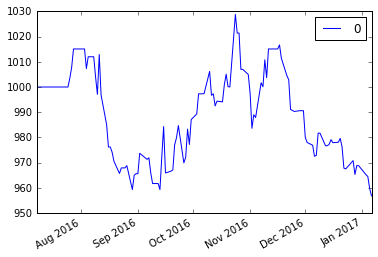

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline
pv.plot()

                  price      pv
2016-07-08  1000.000000  1000.0
2016-07-11  1002.248314  1000.0
2016-07-12  1032.725482  1000.0
2016-07-13  1062.203374  1000.0
2016-07-14  1049.712742  1000.0


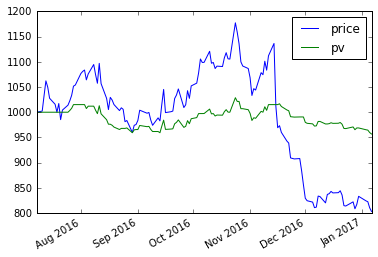

In [7]:
price = price/price.iloc[0,0]* 1000
dat = pd.concat((price, pv), axis=1).dropna()
dat.columns = ["price", "pv"]
print(dat.head())
%matplotlib inline
dat.plot()

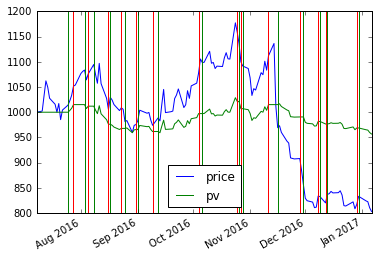

In [8]:
%matplotlib inline
plot = dat.plot()

hold = False
i = 0
while i < orders.shape[0]:
    entry = orders.ix[i]
    t = entry.name
    if entry[1] == "BUY":
        plot.axvline(x = t, color = "green")
        hold = True
        i += 1
    else:
        plot.axvline(x = t, color = "red")
        hold = False
        i += 1
# plot.show()

In [10]:
pv.max()

0    1028.8
dtype: float64

In [3]:
import util as ut
import datetime as dt
import pandas as pd
from Predictor import Predictor

tsd = dt.datetime(2016,7,8)
ted = dt.datetime(2017,1,8)

q = Predictor("args")
q.loadModel("../dat/models/GLOB.mod")

def testPortVals(stocks):
    pvs = {}
    for sym in stocks:
        tsd = dt.datetime(2016,7,8)
        ted = dt.datetime(2017,1,8)
        orders = q.query([sym], tsd, ted)
        pv = ut.compute_portvals(orders, tsd, ted, 1000)
        pvs[sym] = pv.max().values[0]
    return pvs
        
def testSingle(sym, tsd = dt.datetime(2016,8,8), ted = dt.datetime(2017,1,8)):
    
    orders = q.query([sym], tsd, ted)
    pv = ut.compute_portvals(orders, tsd, ted, 1000)
    price = ut.readStocks([sym], dates=pd.date_range(tsd, ted))[sym]
    price = price/price.iloc[0]* 1000
    dat = pd.concat((price, pv), axis=1).dropna()
    dat.columns = ["price", "pv"]
    plot = dat.plot()

    hold = False
    i = 0
    while i < orders.shape[0]:
        entry = orders.ix[i]
        t = entry.name
        if entry[1] == "BUY":
            plot.axvline(x = t, color = "green")
            hold = True
            i += 1
        else:
            plot.axvline(x = t, color = "red")
            hold = False
            i += 1
    return plot


In [2]:
pvs = testPortVals(ut.getLoyal3List())
print(pvs)

{'GOOG': 1000.0, 'TGT': 1019.28143, 'SBUX': 1018.9206699999999, 'SQ': 1036.7, 'TWTR': 1031.8000000000002, 'NKE': 1041.6334299999999, 'AMZN': 1000.0, 'STOR': 1005.5770799999999, 'AEO': 1017.93515, 'PLAY': 1101.0999999999999, 'HUBS': 1055.3000300000001, 'DISCA': 1002.39999, 'SPY': 1122.5366499999973, 'FB': 1043.8999900000001, 'MDLZ': 1045.3872500000002, 'KHC': 1036.9314800000002, 'GPRO': 1079.7, 'ATVI': 1036.0999900000002, 'TRUP': 1002.5, 'NOK': 1002.8, 'WMT': 1027.8382700000004, 'MAT': 1034.48857, 'DIS': 1067.1605600000003, 'YUMC': 1048.8999999999999, 'YHOO': 1027.79999, 'ANF': 1022.2517700000001, 'DNKN': 1083.3564999999994, 'AAPL': 1186.2096200000003, 'VA': 1014.8999799999998, 'BUD': 1043.38455, 'EA': 1058.0000300000002, 'SC': 1016.6000000000001, 'NFLX': 1382.5002200000004, 'DPS': 1009.88293, 'PEP': 1004.8163300000003, 'WWE': 1012.8442699999999, 'MCD': 1000.0, 'TDOC': 1008.9999800000001, 'BRK-B': 1170.4997399999993, 'MSFT': 1081.4970699999994, 'UL': 1013.6611399999999, 'FOXA': 1046.400

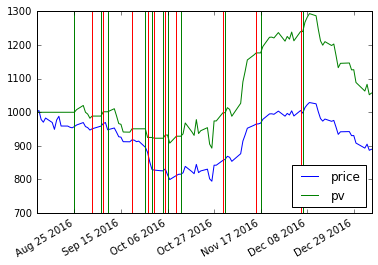

In [4]:
%matplotlib inline
testSingle("BWLD")

In [7]:
pv = ut.compute_portvals(q.query(["BWLD"], tsd, ted), tsd, ted, 1000)
pv.max().value

AttributeError: 'Series' object has no attribute 'value'

In [10]:
pv.max().values[0]

1622.8001199999997